## Exercise 12

Given a 2-dimensional dataset like data1.csv, data2.csv or data3.csv, implement and apply k-means hard clustering with k = 2 and k = 3. Use the Euclidean distance as dissimilarity metric. At each training iteration of the algorithm, compute the quantization error and plot data points and centroids with a different color for each cluster.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
frame = pd.read_csv("data1.csv")

In [3]:
k = 3

In [4]:
def plot(frame, k, prototype):
    for i in range(k):
        proto = prototype.iloc[i]
        mask = frame['tag'] == i
        elem = (frame[mask])
        plt.plot(proto['x'], proto['y'], 'o', markersize=14, label=[elem['tag']])
        plt.plot(elem['x'], elem['y'], 'o', label=[elem['tag']])
    plt.show()

In [5]:
np.random.seed(1)

In [6]:
def norm_cal(x,y):
    return math.sqrt(x**2 + y**2)

In [7]:
def k_means(k, df, delta):
    x = df["x"]
    y = df["y"]
    tag = [-1]*len(df)
    newlist = list(zip(x,y,tag))
    frame = pd.DataFrame(data = newlist, columns=['x', 'y', 'tag'])
    
    #init centroid
    centroids = frame.iloc[np.random.randint(0, len(frame)-1, k)]
    
    
    exit_boolean = True
    
    while exit_boolean:
        # assign nearest point to a prototype
        for i in range(len(frame)):
            mn = np.inf
            point = frame.iloc[i]
            for index in range(len(centroids)):
                distance = np.abs(np.linalg.norm(point-centroids.iloc[index]))
                if (distance < mn):
                    frame.iloc[i][-1] = index
                    mn = distance

        # print time
        plot(frame, k, centroids)
        
        # find new centroid
        tmp = []
        for centroid in range(len(centroids)):
            mask = frame['tag'] == centroid
            avg = np.sum(frame[mask])
            avg = avg / len(frame[mask])
            tmp.append(avg)
        tmpcentroids = pd.DataFrame(data = tmp, columns=['x', 'y', 'tag'])

        # exit option
        quantization_error = 0
        for i in range (k):
            c = centroids.iloc[i]
            t = tmpcentroids.iloc[i]
            c = norm_cal(c['x'], c['y'])
            t = norm_cal(t['x'], t['y'])
            quantization_error = math.pow(c - t, 2)
        print(quantization_error)
        centroids = tmpcentroids
        if (quantization_error  < delta):
            exit_boolean = 0
        

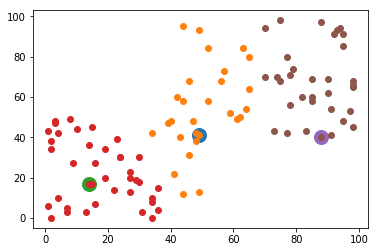

155.26648841524087


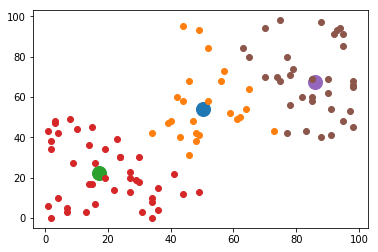

0.0738301322408008


In [8]:
k_means(k, frame, 0.5)

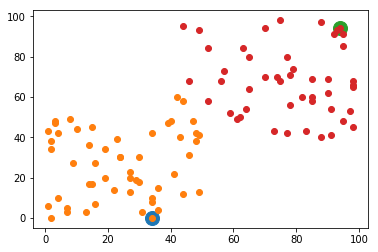

905.1121262420105


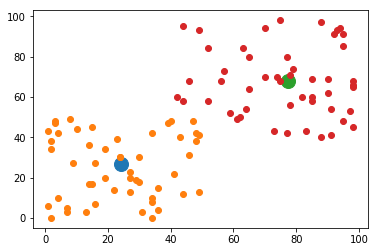

1.6590863651584804


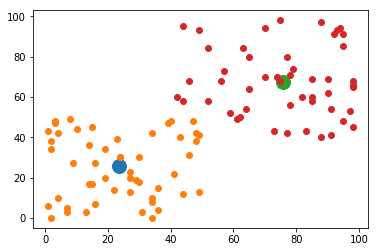

0.0


In [9]:
k_means(2, frame, 0.1)